# Village consumption smoothing 

We simulate T periods of income for N individuals.  Each individual receives a base level of income plus an income shocks.  The income shocks can be independent or correlated.  

We plot income in each household with and without consumption smoothing. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider
%matplotlib inline

#### Default parameters

In [12]:
rho = 0   
N = 5
T = 15
V = 1

In [13]:
def shocks(rho=0, N=N, T=T):
    '''Returns an N by T matrix of multivariate normally distributed shocks with correlation rho'''
    mean = np.zeros(N)
    cov = np.ones((N, N), int)*rho*V
    np.fill_diagonal(cov, V)
    #print(cov)
    e = np.random.multivariate_normal(mean, cov, size=T)
    return e

In [14]:
def incomes(rho=0, V=V, N = N, T=T):
    '''Generates random incomes for N over T periods'''
    t = np.arange(T)   # time periods
    x0 = np.arange(10,10+N*5,5)   # average income
    e = shocks(rho=rho, N=N, T=T)*V
    X = x0 + e
    
    XT = np.sum(X, axis = 1)
    
    w = x0/np.sum(x0)
    XS = np.array([XT * wt for wt in w]).T
    
    return t, X, XS

In [15]:
def plot_cons(rho=0, V=1):
    #print('rho = {}'.format(rho))
    t, X, XS = incomes(rho=rho, V=V, N=N, T=T)
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(t, X,'x-')
    ax.plot(t,XS,linestyle='dashed')
    ax.set_xlabel('time')
    ax.set_xticks(np.arange(T, step=1))
    fig.suptitle(r'$\rho = {:0.2f}$'.format(rho))
    ax.grid()
    plt.tight_layout();

In [16]:
interact(plot_cons, rho=(-0.25,0.99,0.05));

interactive(children=(FloatSlider(value=0.0, description='rho', max=0.99, min=-0.25, step=0.05), IntSlider(val…

## Examples 

We illustrate with three different scenarios.  Remember that these are random draws so will be different everytime these are run.

### independent incomes

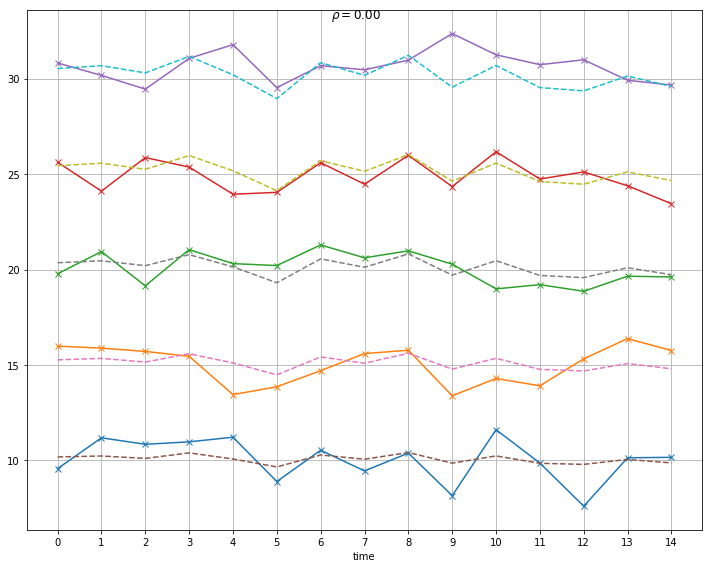

In [17]:
plot_cons(rho=0, V=1)

### Correlated incomes

Less opportunity for risk sharing. So consumption will tend to follow income. 

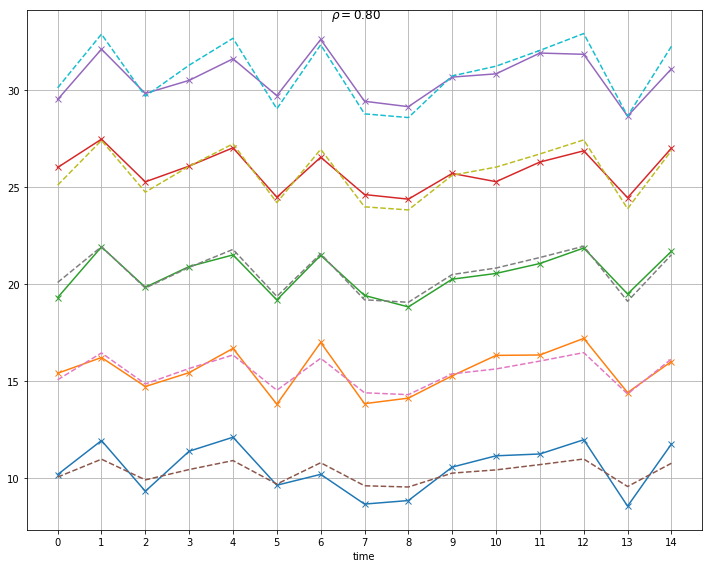

In [18]:
plot_cons(rho=0.8, V=1)

### Negatively correlated

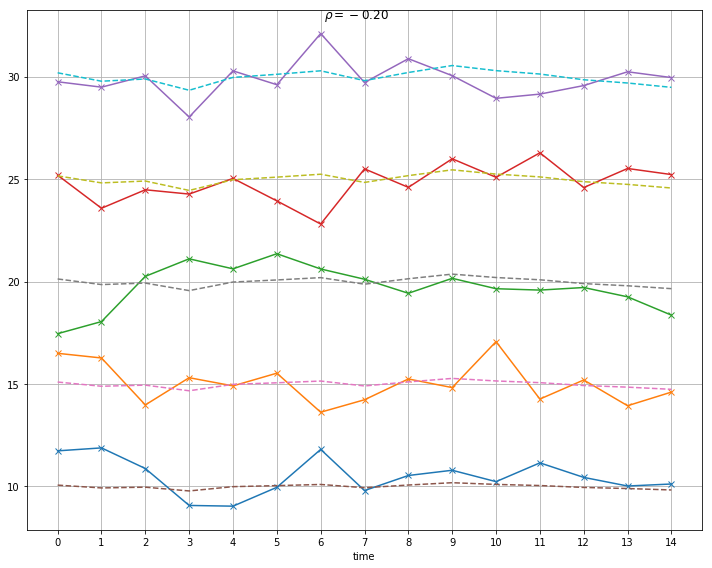

In [19]:
plot_cons(rho=-0.2, V=1)